In [1]:
import extract_patches as patches
import openslide

WSI_dir="/mnt/c/Users/rosie/WSL/helpful_code/data-loader/WSIs"
mask_dir="/mnt/c/Users/rosie/WSL/helpful_code/data-loader/masks"

image_file_names, mask_file_names = patches.get_image_and_mask_names(WSI_dir, mask_dir)
print(image_file_names)
print(mask_file_names)

for image_file_name in image_file_names:
    image = openslide.OpenSlide(image_file_name)
    #mask = openslide.OpenSlide(mask_file_name)

    print(image.level_dimensions)
    #print(mask.level_dimensions)

    threshold =  patches.get_otsu_threshold(image)
    print(threshold)

    patch_size = (224, 224)
    stride = (112, 112)
    x_coords, y_coords = patches.get_patch_origin_coords(image, patch_size, stride)
    print(x_coords)
    print(y_coords)

    for x in x_coords:
        for y in y_coords:
            if y == 16576 and x == 16576:
                extracted_patch = patches.extract_patch(image, x, y, threshold, 
                image_file_name, patch_size)

['412_16.tif']
['412_16.tif']
['/mnt/c/Users/rosie/WSL/helpful_code/data-loader/WSIs/412_16.tif']
['/mnt/c/Users/rosie/WSL/helpful_code/data-loader/masks/412_16.tif']
((29824, 27840), (14912, 13920), (7456, 6960), (3728, 3480), (1864, 1740), (932, 870), (466, 435))
0.6980392156862745
[0, 448, 896, 1344, 1792, 2240, 2688, 3136, 3584, 4032, 4480, 4928, 5376, 5824, 6272, 6720, 7168, 7616, 8064, 8512, 8960, 9408, 9856, 10304, 10752, 11200, 11648, 12096, 12544, 12992, 13440, 13888, 14336, 14784, 15232, 15680, 16128, 16576, 17024, 17472, 17920, 18368, 18816, 19264, 19712, 20160, 20608, 21056, 21504, 21952, 22400, 22848, 23296, 23744, 24192, 24640, 25088, 25536, 25984, 26432, 26880, 27328, 27776, 28224, 28672, 29120, 29568]
[0, 448, 896, 1344, 1792, 2240, 2688, 3136, 3584, 4032, 4480, 4928, 5376, 5824, 6272, 6720, 7168, 7616, 8064, 8512, 8960, 9408, 9856, 10304, 10752, 11200, 11648, 12096, 12544, 12992, 13440, 13888, 14336, 14784, 15232, 15680, 16128, 16576, 17024, 17472, 17920, 18368, 18816,

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 

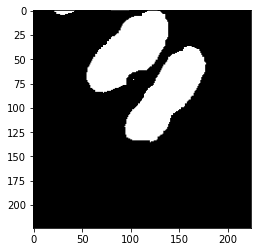

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

mask = openslide.OpenSlide("/mnt/c/Users/rosie/WSL/helpful_code/data-loader/masks/412_16_epithelium_mask.tif")
patch = mask.read_region((16576,16576), 2, (224, 224), ).convert('L')
patch_array = np.asarray(patch).astype('uint8')*255
patch_array.shape
print(patch_array[100,:])
print(patch_array[125,:])

patch_PIL = Image.fromarray(patch_array)

plt.imshow(patch_array, cmap="gray")
plt.show()

patch_PIL.save("/mnt/c/Users/rosie/WSL/output_images/test.png")
